# Random Forest.

Random Forests are an ensemble learning  method for classifictaion, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
lc_data = pd.read_csv("../data/loan_clean.csv")
lc_data.drop('Unnamed: 0', inplace=True, axis=1)

In [3]:
lc_data

,loan_amnt,int_rate,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,pub_rec,...,tax_liens,total_bal_ex_mort,home_ownership_MORTGAGE,home_ownership_OWN,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,initial_list_status_w,application_type_Joint App,debt_settlement_flag_Y
0,11575.0,0.0735,153000.0,1.0,16.99,0.0,720.0,0.0,20.0,1.0,...,0.0,100865.0,0,1,0,0,0,1,0,0
1,7200.0,0.2485,50000.0,1.0,6.07,0.0,685.0,0.0,4.0,0.0,...,0.0,5588.0,0,0,1,0,0,1,0,0
2,7500.0,0.0735,110000.0,1.0,13.12,0.0,710.0,2.0,19.0,0.0,...,0.0,45955.0,1,0,0,0,0,1,0,0
3,10000.0,0.1602,51979.0,1.0,10.11,0.0,690.0,0.0,15.0,2.0,...,0.0,10956.0,0,0,1,0,0,1,0,0
4,14000.0,0.1602,75000.0,1.0,10.86,1.0,685.0,0.0,4.0,0.0,...,0.0,27684.0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406070,11575.0,0.1559,25400.0,1.0,27.08,0.0,680.0,0.0,9.0,0.0,...,0.0,19798.0,0,0,0,1,0,0,0,0
406071,12000.0,0.1199,63000.0,0.0,23.69,1.0,685.0,0.0,13.0,0.0,...,0.0,112990.0,1,0,0,1,0,0,0,0
406072,13000.0,0.1599,35000.0,0.0,30.90,0.0,680.0,0.0,9.0,1.0,...,0.0,34178.0,0,0,0,1,0,1,0,0
406073,12000.0,0.1999,64400.0,0.0,27.19,1.0,695.0,2.0,17.0,0.0,...,0.0,58418.0,0,0,1,0,0,1,0,0


In [7]:
y = lc_data['loan_status']
X = lc_data.drop('loan_status', axis=1)

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [6]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x_train)
x_scaled

array([[-1.02554097, -1.2312208 , -0.53138776, ...,  0.87443215,
        -0.05948886, -0.13935803],
       [-0.59249937,  0.90980892, -0.71757538, ...,  0.87443215,
        -0.05948886, -0.13935803],
       [-1.02554097, -0.54556046, -0.45977714, ..., -1.14359931,
        -0.05948886, -0.13935803],
       ...,
       [-1.11331968,  0.78152408, -0.81783026, ..., -1.14359931,
        -0.05948886, -0.13935803],
       [-1.14257924, -1.56299194, -0.18765677, ...,  0.87443215,
        -0.05948886, -0.13935803],
       [-0.32331135,  0.33916257, -0.13036827, ...,  0.87443215,
        -0.05948886, -0.13935803]])

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [9]:
%%time

param_test1 = {
    'max_depth' : [4,8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
 }
g_RandomForest = GridSearchCV(estimator = RandomForestClassifier(500), 
                               param_grid = param_test1, scoring='roc_auc', iid=False, cv=3)
g_RandomForest.fit(x_train, y_train)

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Wall time: 1h 5min 5s


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=500),
             iid=False,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 8],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='roc_auc')

In [10]:
g_RandomForest.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}

In [11]:
g_RandomForest.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500)

In [12]:
%%time

g_RandomForest2 = g_RandomForest.best_estimator_
g_RandomForest2.fit(x_train, y_train)

Wall time: 3min 57s


RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500)

In [9]:
y_pred2 = g_RandomForest2.predict(x_test)

In [10]:
from sklearn import metrics
print("Accuracy train: ", metrics.accuracy_score(y_train, g_RandomForest2.predict(x_train)))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred2))

Accuracy train:  0.961819829522321
Accuracy test: 0.9612387828879323


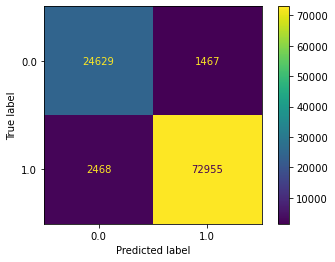

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(g_RandomForest2, x_test, y_test)

The accuracy in both the train and the test sets has been pretty similar. It looks like there is no severe overfitting or underfitting, which is good news.
Only 2468 of fully paid loans (3%) have misplaced, while the 5% of defaults have been identified as paid loans.

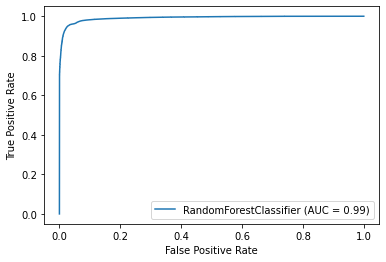

In [20]:
metrics.plot_roc_curve(g_RandomForest2, x_test, y_test)

In [1]:
import pickle

def save_models(filename, model):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [18]:
save_models('rf_model.sav', g_RandomForest2)